# Year 2 Lab Project Finalised Simulations
#### Author - Guner Aygin

This is a refined version of the most important bits of code necessary so that I can quickly change variables and parameters without having to search through long lists of irrelevant information.

In [ ]:
A few notes: Within this code there are a lot of copy and pasting, which looks like it could be done in a much more efficient way. Any ideas for how I could trim some of the code d

#### Necessary Imports

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.constants import physical_constants as pc_dict
from mpl_toolkits import mplot3d 

## Masses and Radii

### The Star

In [2]:
''' Star that is being modelled is the Sun '''

Rs = 7E+8   # approx radius of the sun in m
Ms = 2E+30   # approx mass of sun in kg

### The Planet

In [3]:
''' Planet that is being modelled is Jupiter '''

Rj = 7E+7  # approx radius of Jupiter in m
Mj = 1.9E+27  # approx mass of Jupiter in kg

### Orbit of Planet around Star

In [4]:
'''Orbit of Jupiter Around the Sun'''

theta = np.linspace(0, 2*np.pi, num=500)

omega = np.pi/4    # an arbitrary phase
I = np.pi/2
Omega = np.pi
f = theta - omega

e = 0.0489       # eccentricity of Jupiter
a = 7.8E+11      # semi-major axis of Jupiter 

b_tra = a*np.cos(I)/Rs * (1-e**2)/(1+e*np.sin(omega))     # semi-minor axis during transit
b_occ = a*np.cos(I)/Rs * (1-e**2)/(1-e*np.sin(omega))     # semi-minor axis during occulation

T = 4*24*60**2  # 4 day period in seconds

## 2D Orbital Mechanics 

In [5]:
def radius(a, e, f):
    ''' defines the radius of orbit as given by the equation for r above'''
    r = (a*(1-e**2))/(1+e*np.cos(f))
    return r

r = radius(a,e,f)
x = r*np.cos(f)
y = r*np.sin(f)

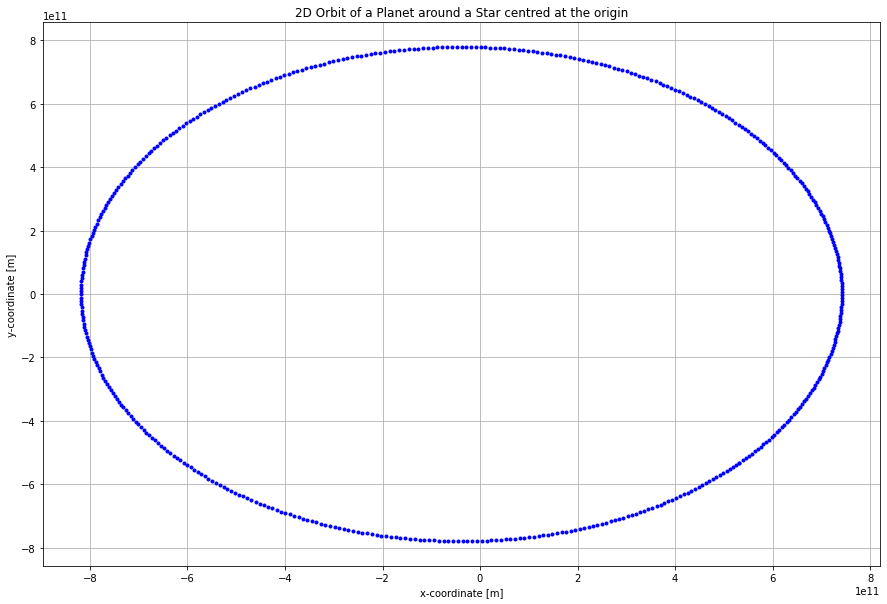

In [6]:
fig = plt.figure(figsize=(15,10))
ax = plt.plot(x, y, 'b.')
plt.grid()
plt.xlabel('x-coordinate [m]')
plt.ylabel('y-coordinate [m]')
plt.title('2D Orbit of a Planet around a Star centred at the origin')
plt.show()

## 3D Orbital Mechanics

In [7]:
X = r*(np.cos(Omega)*np.cos(omega + f) - np.sin(Omega)*np.sin(omega + f)*np.cos(I))
Y = r*(np.sin(Omega)*np.cos(omega + f) + np.cos(Omega)*np.sin(omega + f)*np.cos(I))
Z = r*np.sin(omega + f)*np.sin(I)

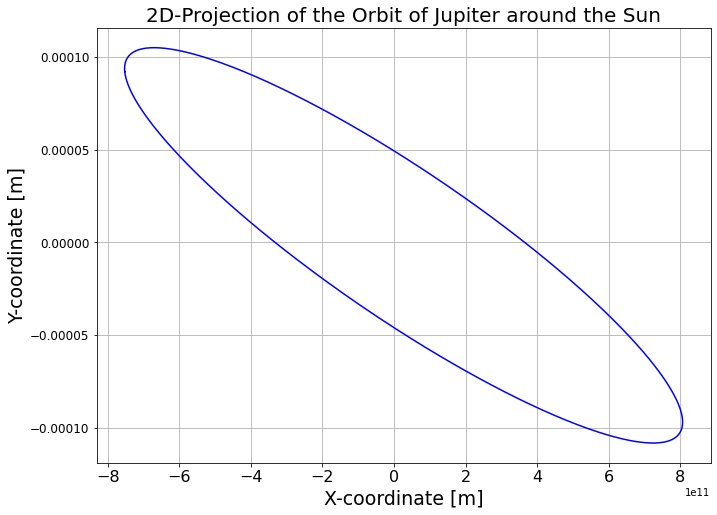

In [8]:
fig = plt.figure(figsize=(11,8))
ax = plt.plot(X, Y, 'b')
plt.title('2D-Projection of the Orbit of Jupiter around the Sun', size=20)
plt.grid()
plt.xlabel('X-coordinate [m]', size=19)
plt.xticks(size=16)
plt.ylabel('Y-coordinate [m]', size=19)
plt.yticks(size=12)
#plt.savefig("3D_projection_in_2D.png")
plt.show()

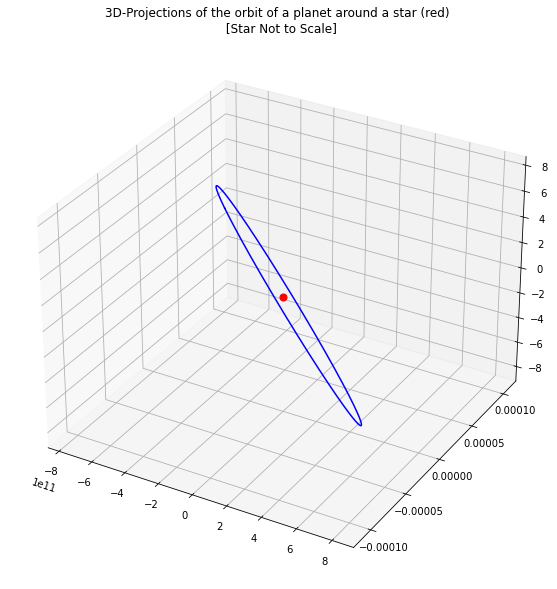

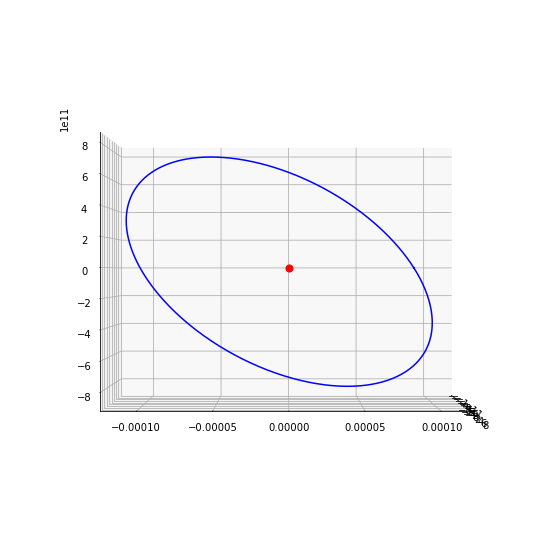

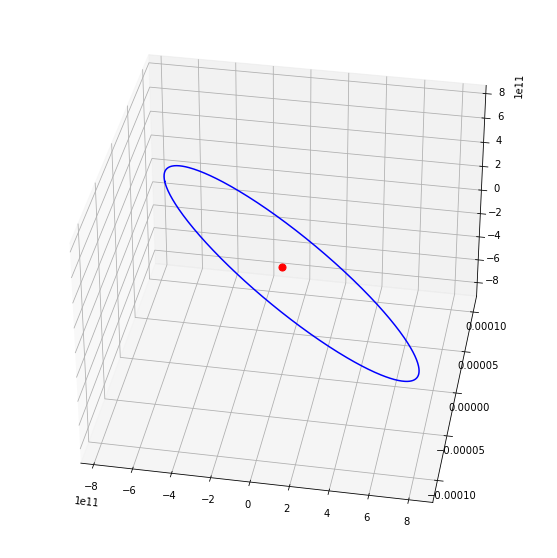

In [9]:
fig = plt.figure(figsize=(15,10))

'''First Plot'''
ax = plt.axes(projection ='3d')   
ax.plot3D(X,Y,Z,'blue') 
ax.scatter([0], [0], [0], color="r", s=50) # red dot acting as star
plt.title('3D-Projections of the orbit of a planet around a star (red) \n [Star Not to Scale]')
plt.show() 

'''Second Plot with variable angles'''
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')   
ax.plot3D(X,Y,Z,'blue') 
ax.scatter([0], [0], [0], color="r", s=50) # red dot acting as star
ax.view_init(0, 0)
plt.show()

'''Third Plot with variable angles'''
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection ='3d')   
ax.plot3D(X,Y,Z,'blue') 
ax.scatter([0], [0], [0], color="r", s=50) # red dot acting as star
ax.view_init(35, 280)
#plt.savefig("3D_orbit_in_3D.png")
plt.show()

## Relative Flux as a function of Time - Jupiter-Sun System

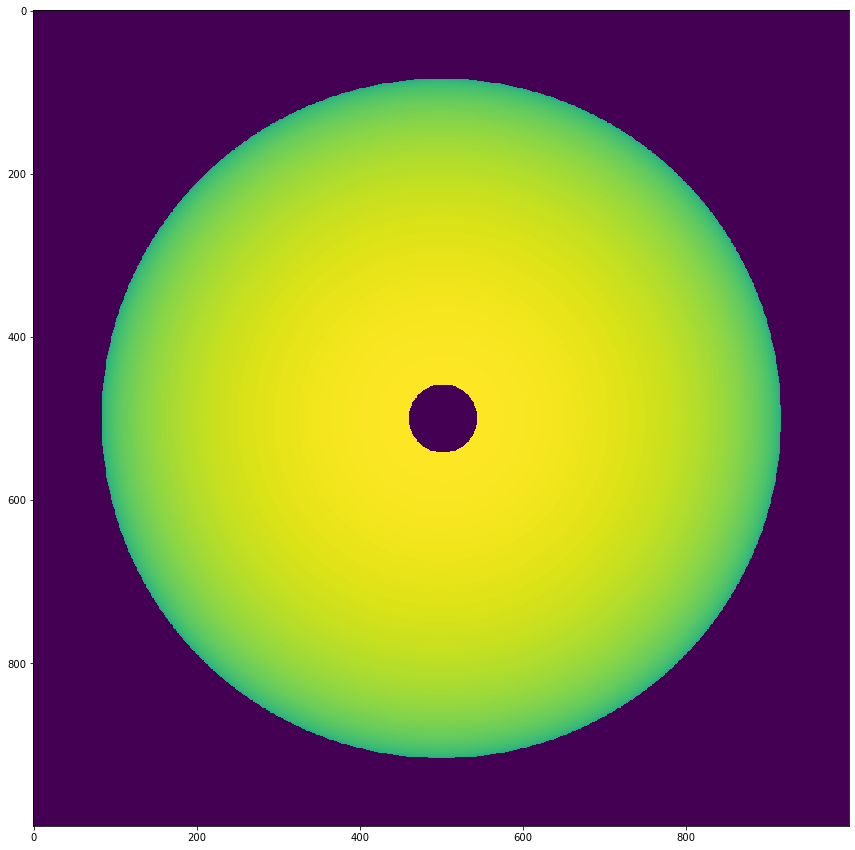

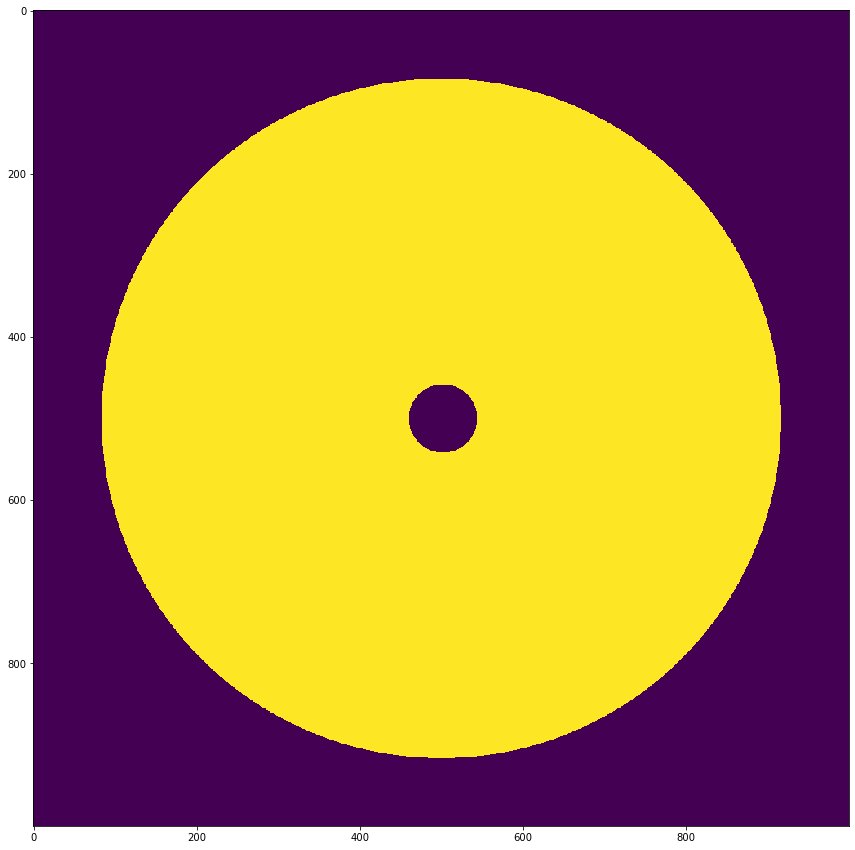

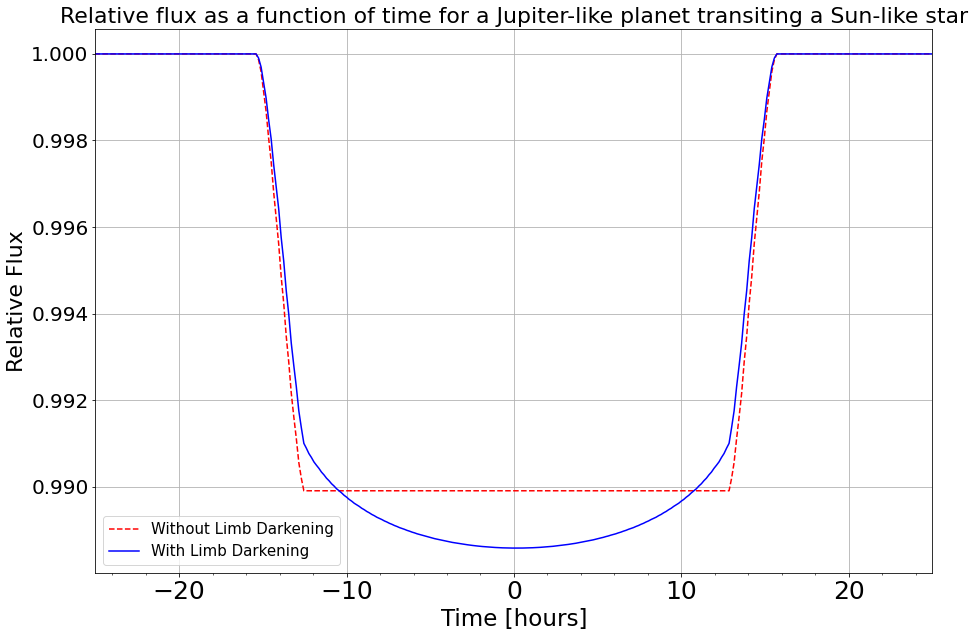

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

def intensity (x,y): # Draws the star with limb darkening  
    global r_star,centre_of_star
    r_squared= (x-centre_of_star[1])**2 + (y-centre_of_star[1])**2
    circle_mask = (x-centre_of_star[1])**2 + (y-centre_of_star[1])**2 <= r_star**2
    mu = np.sqrt(1 - r_squared/r_star**2,where=((x-centre_of_star[1])**2 + (y-centre_of_star[1])**2 <= r_star**2))
    
    return Intensity_max*(1-mu1*(1-mu)-mu2*(1 - mu)**2)*circle_mask

def planet_writer(x,y): # Draws the planet at the given centre  
    global centre_of_planet,r_planet
    return (x-centre_of_planet[1])**2 + (y-centre_of_planet[0])**2 > (r_planet)**2


def draw_stage(i,background): # Adds together the planet and star onto the same canvas
    global centre_of_planet, display_dim
    centre_of_planet = [X_coord_on_grid[i],Z_coord_on_grid[i]]
    
    display_added_planet = 1 * np.fromfunction(planet_writer, (display_dim, display_dim), dtype=int)
   
    return display_added_planet * background

###################################### Defining variables and constants

radius_of_sun = 695700e3 # Star radius in m
radius_of_jupiter = 69911e3 # Planet radius in m

''' Orbital Variables '''
a= 778.570e9 # Semi Major axis in m
e = 0.0489 # Eccentricity < 1 to work
theta = np.linspace(-2.5 *10e-4, 2.5*10e-4, num=500) # Angular range where the planet crosses the star
phase = 0 
f = theta - phase 
r = a*(1 - e**2)/ (1 + e*np.cos(f)) # Distance between the star and the planet
i = 0
omega = np.pi/2
w = omega + phase

''' Limb Darkening Variables '''
mu1 = 0.3 # Variables for limb darkening 
mu2 = 0.1 # Variables for limb darkening 
Intensity_max = 100 # Max Intensity for limb darkening

'''Other variables'''
from scipy.constants import physical_constants as pc_dict
G = pc_dict['Newtonian constant of gravitation'][0]
Ms = 1988500e24   # approx mass of sun in kg
Mp = 1898.19e24  # approx mass of Jupiter in kg


''' Display '''
# For a high resolution display use display_dim = 1000
# For a quick-to-execute display use display_dim = 100'''

display_dim = 1000 # Size of the 'display'

''' Flux Graph '''
flux = []
###################################### Equations of motion
X_3D = - r* np.cos(w +f) 
Y_3D = - r* np.sin(w +f)* np.cos(i)
Z_3D = r* np.sin(w +f)* np.sin(i)

###################################### Set up of display
display = np.zeros((display_dim, display_dim))
centre_of_display = display_dim/2

###################################### Planet
SF = (radius_of_sun + 2*radius_of_jupiter) # Scaling display to fit star/planet

X_coord_on_grid = np.round(X_3D/SF * centre_of_display + centre_of_display) # Scaling X with respect to display
Z_coord_on_grid = np.round(Z_3D/SF * centre_of_display + centre_of_display) # Scaling Z with respect to display

r_planet = radius_of_jupiter/SF *  display_dim/2 # Scaling planet radius with respect to display
###################################### Star 
centre_of_star = [centre_of_display,centre_of_display] # Centre of star
r_star = radius_of_sun/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

####################################### Graph of star and planet
i = 250

display = draw_stage(i,display_with_star)

fig = plt.figure(figsize=(15,15))
plt.imshow(display, interpolation='nearest')

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
i = 0

while i<500:

    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux.append(display)
    display = np.sum(draw_stage(0,display_with_star))
    
    i+=1
    
relative_flux = flux/normalisation_constant


''' Period of Orbit'''
P = np.sqrt((4*np.pi**2)/(G*(Ms+Mp)) * a**3)

''' Finding the velocity of the planet '''
n = 2*np.pi/P # mean motion 
v = np.sqrt((((n**2)*(a**2))/(1-e**2))*(1+2*e*np.cos(f)+e**2))
mean_v = np.sum(v)/len(v) # average velocity that is very similar to each velocity in the array of v
mean_v # in m/s

'''Finding time'''
distance = np.abs(max(X_3D)) + np.abs(min(X_3D))  
t = distance/mean_v 
t = t/60**2   # time in hours

import numpy as np
import matplotlib.pyplot as plt

def intensity (x,y): # Draws the star with limb darkening  
    global r_star,centre_of_star
    r_squared= (x-centre_of_star[1])**2 + (y-centre_of_star[1])**2
    circle_mask = (x-centre_of_star[1])**2 + (y-centre_of_star[1])**2 <= r_star**2
    mu = np.sqrt(1 - r_squared/r_star**2,where=((x-centre_of_star[1])**2 + (y-centre_of_star[1])**2 <= r_star**2))
    
    return Intensity_max*(1-mu1*(1-mu)-mu2*(1 - mu)**2)*circle_mask

def planet_writer(x,y): # Draws the planet at the given centre  
    global centre_of_planet,r_planet
    return (x-centre_of_planet[1])**2 + (y-centre_of_planet[0])**2 > (r_planet)**2


def draw_stage(i,background): # Adds together the planet and star onto the same canvas
    global centre_of_planet, display_dim
    centre_of_planet = [X_coord_on_grid[i],Z_coord_on_grid[i]]
    
    display_added_planet = 1 * np.fromfunction(planet_writer, (display_dim, display_dim), dtype=int)
   
    return display_added_planet * background

###################################### Defining variables and constants

radius_of_sun = 695700e3 # Star radius in m
radius_of_jupiter = 69911e3 # Planet radius in m

''' Orbital Variables '''
a= 778.570e9 # Semi Major axis in m
e = 0.0489 # Eccentricity < 1 to work
theta = np.linspace(-2.5 *10e-4, 2.5*10e-4, num=500) # Angular range where the planet crosses the star
phase = 0 
f = theta - phase 
r = a*(1 - e**2)/ (1 + e*np.cos(f)) # Distance between the star and the planet
i = 0
omega = np.pi/2
w = omega + phase

''' Limb Darkening Variables '''
mu1 = 0 # Variables for limb darkening 
mu2 = 0 # Variables for limb darkening 
Intensity_max = 100 # Max Intensity for limb darkening

'''Other variables'''
from scipy.constants import physical_constants as pc_dict
G = pc_dict['Newtonian constant of gravitation'][0]
Ms = 1988500e24   # approx mass of sun in kg
Mp = 1898.19e24  # approx mass of Jupiter in kg


''' Display '''
# For a high resolution display use display_dim = 1000
# For a quick-to-execute display use display_dim = 100'''

display_dim = 1000 # Size of the 'display'

''' Flux Graph '''
flux_2 = []
###################################### Equations of motion
X_3D = - r* np.cos(w +f) 
Y_3D = - r* np.sin(w +f)* np.cos(i)
Z_3D = r* np.sin(w +f)* np.sin(i)

###################################### Set up of display
display = np.zeros((display_dim, display_dim))
centre_of_display = display_dim/2

###################################### Planet
SF = (radius_of_sun + 2*radius_of_jupiter) # Scaling display to fit star/planet

X_coord_on_grid = np.round(X_3D/SF * centre_of_display + centre_of_display) # Scaling X with respect to display
Z_coord_on_grid = np.round(Z_3D/SF * centre_of_display + centre_of_display) # Scaling Z with respect to display

r_planet = radius_of_jupiter/SF *  display_dim/2 # Scaling planet radius with respect to display
###################################### Star 
centre_of_star = [centre_of_display,centre_of_display] # Centre of star
r_star = radius_of_sun/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

####################################### Graph of star and planet
i = 250

display = draw_stage(i,display_with_star)

fig = plt.figure(figsize=(15,15))
plt.imshow(display, interpolation='nearest')

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
i = 0

while i<500:

    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_2.append(display)
    display = np.sum(draw_stage(0,display_with_star))
    
    i+=1
    
relative_flux_2 = flux_2/normalisation_constant


''' Period of Orbit'''
P = np.sqrt((4*np.pi**2)/(G*(Ms+Mp)) * a**3)

''' Finding the velocity of the planet '''
n = 2*np.pi/P # mean motion 
v = np.sqrt((((n**2)*(a**2))/(1-e**2))*(1+2*e*np.cos(f)+e**2))
mean_v = np.sum(v)/len(v) # average velocity that is very similar to each velocity in the array of v
mean_v # in m/s

'''Finding time'''
distance = np.abs(max(X_3D)) + np.abs(min(X_3D))  
t = distance/mean_v 
t = t/60**2   # time in hours

'''Plotting the graph'''
factor = flux.index(min(flux))/500  # factor to keep T=0 at the centre of the trough

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(np.linspace(-np.round(t)*(factor),np.round(t)*(1-factor),500), relative_flux_2, 'r--', label='Without Limb Darkening')
plt.plot(np.linspace(-np.round(t)*(factor),np.round(t)*(1-factor),500), relative_flux, 'b', label='With Limb Darkening')
plt.grid()
plt.title('Relative flux as a function of time for a Jupiter-like planet transiting a Sun-like star', size=22)
plt.xlabel('Time [hours]', size=23)
plt.xlim(-25,25)
plt.xticks(fontsize=25)
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.ylabel('Relative Flux', size=22)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', prop={'size':15})
#plt.savefig('fluxplot.png')
plt.show()

## Relative Flux as a function of time - HD 209458b

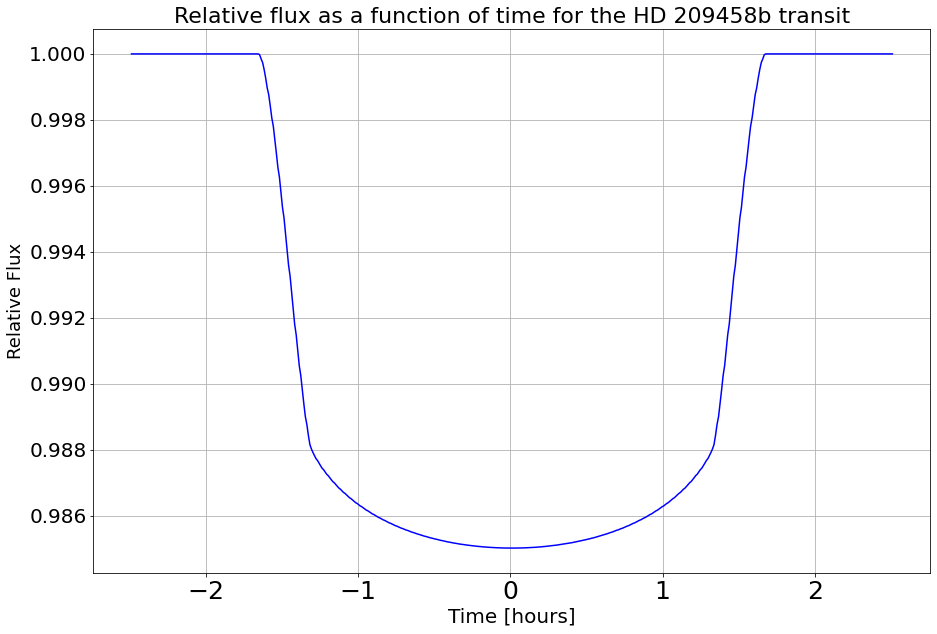

In [11]:
import numpy as np
import matplotlib.pyplot as plt 

def intensity (x,y): # Draws the star with limb darkening  
    global r_star,centre_of_star
    r_squared= (x-centre_of_star[1])**2 + (y-centre_of_star[1])**2
    circle_mask = (x-centre_of_star[1])**2 + (y-centre_of_star[1])**2 <= r_star**2
    mu = np.sqrt(1 - r_squared/r_star**2,where=((x-centre_of_star[1])**2 + (y-centre_of_star[1])**2 <= r_star**2))
    
    return Intensity_max*(1-mu1*(1-mu)-mu2*(1 - mu)**2)*circle_mask

def planet_writer(x,y): # Draws the planet at the given centre  
    global centre_of_planet,r_planet
    return (x-centre_of_planet[1])**2 + (y-centre_of_planet[0])**2 > (r_planet)**2


def draw_stage(i,background): # Adds together the planet and star onto the same canvas
    global centre_of_planet, display_dim
    centre_of_planet = [X_coord_on_grid[i],Z_coord_on_grid[i]]
    
    display_added_planet = 1 * np.fromfunction(planet_writer, (display_dim, display_dim), dtype=int)
   
    return display_added_planet * background

##################################################
''' Defining some essential variables '''
Mj = 1.898E+27 # mass of Jupiter in kg
Ms = 1.989E+30 # mass of Sun in kg

Rj = 6.9911E+7 #radius of Jupiter in m
Rs = 6.9634E+8 #radius of Sun in m

AU = 1.496E+11 # 1 AU in m


''' Variables of HD 209458 System'''
Mp = 0.69*Mj # mass of HD 209458b
Mstar = 1.148*Ms # mass of HD 20958

Rp = 1.38*Rj # radius of HD 209458b
Rstar = 1.203*Rs # radius of HD 209458

a = 0.04747*AU
e = 0.0082
omega = np.pi/2
i = 0
theta = np.linspace(-2 *10e-2, 2*10e-2, num=500) # Angular range where the planet crosses the star
phase = 0 
f = theta - phase 
r = a*(1 - e**2)/ (1 + e*np.cos(f)) # Distance between the star and the planet
w = omega + phase

mu1 = 0.3 # Variables for limb darkening 
mu2 = 0.1 # Variables for limb darkening 
Intensity_max = 100 # Max Intensity for limb darkening


''' Display '''
# For a high resolution display use display_dim = 1000
# For a quick-to-execute display use display_dim = 100'''

display_dim = 1000 # Size of the 'display'

''' Flux Graph '''
flux = []
###################################### Equations of motion
X_3D = - r* np.cos(w +f) 
Y_3D = - r* np.sin(w +f)* np.cos(i)
Z_3D = r* np.sin(w +f)* np.sin(i)

###################################### Set up of display
display = np.zeros((display_dim, display_dim))
centre_of_display = display_dim/2

###################################### Planet
SF = (Rstar + 2*Rp) # Scaling display to fit star/planet

X_coord_on_grid = np.round(X_3D/SF * centre_of_display + centre_of_display) # Scaling X with respect to display
Z_coord_on_grid = np.round(Z_3D/SF * centre_of_display + centre_of_display) # Scaling Z with respect to display

r_planet = Rp/SF *  display_dim/2 # Scaling planet radius with respect to display
###################################### Star 
centre_of_star = [centre_of_display,centre_of_display] # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
i = 0

while i<500:

    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux.append(display)
    display = np.sum(draw_stage(0,display_with_star))
    
    i+=1
    
relative_flux = flux/normalisation_constant


''' Period of Orbit'''
P = 3.52472*24*60**2

''' Finding the velocity of the planet '''
n = 2*np.pi/P # mean motion 
v = np.sqrt((((n**2)*(a**2))/(1-e**2))*(1+2*e*np.cos(f)+e**2))
mean_v = np.sum(v)/len(v) # average velocity that is very similar to each velocity in the array of v
mean_v # in m/s

'''Finding time'''
distance = np.abs(max(X_3D)) + np.abs(min(X_3D))  
t = distance/mean_v 
t = t/60**2   # time in hours

'''Plotting the graph'''
factor = flux.index(min(flux))/500  # factor to keep T=0 at the centre of the trough

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax = plt.plot(np.linspace(-np.round(t)*(factor),np.round(t)*(1-factor),500), relative_flux, 'b')
plt.grid()
plt.title('Relative flux as a function of time for the HD 209458b transit', size=22)
plt.xlabel('Time [hours]', size=20)
plt.xlim()
plt.xticks(fontsize=25)
plt.ylabel('Relative Flux', size=18)
plt.yticks(fontsize=20)
plt.show()

## Modelling Experimental Data with the Simulation

In [13]:
import os
os.getcwd()
data_set = '/Users/guneraygin/Desktop/University/Y2 Lab Project/Data/Lab_data.txt'

import pandas as pd
data = pd.read_csv(data_set,delim_whitespace=True)

data['epochs'] = data['Heliocentric_Julian_Date'].round(0)
unique_transit_times = data.epochs.unique()

first_transit  = data[data['epochs']  == unique_transit_times[0]]
second_transit = data[data['epochs']  == unique_transit_times[1]]
third_transit = data[data['epochs']  == unique_transit_times[2]]
fourth_transit = data[data['epochs']  == unique_transit_times[3]]
fifth_transit = data[data['epochs']  == unique_transit_times[4]]

unique_wavelengths = data.Center_Wavelength.unique()

first_wavelength  = data[data['Center_Wavelength']  == unique_wavelengths[0]]
second_wavelength = data[data['Center_Wavelength']  == unique_wavelengths[1]]
third_wavelength = data[data['Center_Wavelength']  == unique_wavelengths[2]]
fourth_wavelength = data[data['Center_Wavelength']  == unique_wavelengths[3]]
fifth_wavelength = data[data['Center_Wavelength']  == unique_wavelengths[4]]
sixth_wavelength = data[data['Center_Wavelength']  == unique_wavelengths[5]]
seventh_wavelength = data[data['Center_Wavelength']  == unique_wavelengths[6]]
eighth_wavelength = data[data['Center_Wavelength']  == unique_wavelengths[7]]
ninth_wavelength = data[data['Center_Wavelength']  == unique_wavelengths[8]]
tenth_wavelength = data[data['Center_Wavelength']  == unique_wavelengths[9]]

In [14]:
''' Splicing the data '''

first_wavelength_1 = first_transit[0:252] # all data for first half of first wavelength: there are 10 wavelengths in total.
first_wavelength_2 = third_transit[0:252]

second_wavelength_1 = first_transit[252:504]
second_wavelength_2 = third_transit[252:504]

third_wavelength_1 = first_transit[504:756]
third_wavelength_2 = third_transit[504:756]

fourth_wavelength_1 = first_transit[756:1008]
fourth_wavelength_2 = third_transit[756:1008]

fifth_wavelength_1 = first_transit[1008:1260]
fifth_wavelength_2 = third_transit[1008:1260]

sixth_wavelength_1 = second_transit[0:274]
sixth_wavelength_2 = fourth_transit[0:30]
sixth_wavelength_3 = fifth_transit[0:244]

seventh_wavelength_1 = second_transit[274:548]
seventh_wavelength_2 = fourth_transit[30:60]
seventh_wavelength_3 = fifth_transit[244:488]

eighth_wavelength_1 = second_transit[548:822]
eighth_wavelength_2 = fourth_transit[60:90]
eighth_wavelength_3 = fifth_transit[488:732]

ninth_wavelength_1 = second_transit[822:1096]
ninth_wavelength_2 = fourth_transit[90:120]
ninth_wavelength_3 = fifth_transit[732:976]

tenth_wavelength_1 = second_transit[1096:1370]
tenth_wavelength_2 = fourth_transit[120:150]
tenth_wavelength_3 = fifth_transit[976:1220]

In [ ]:
%%time
import numpy as np
import matplotlib.pyplot as plt 

''' Coefficients from Knutson Paper '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]

  # Change this to go throught the wavelength ranges

# 293 - 347   0
# 348 - 402   1 
# 403 - 457   2
# 458 - 512   3
# 512 - 567   4
# 532 - 629   5
# 629 - 726   6
# 727 - 824   7
# 825 - 922   8
# 922 - 1019  9

def intensity(z,x): # Draws the star with limb darkening  
    global r_star,centre_of_star
    r_squared= (z-centre_of_star)**2 + (x - centre_of_star)**2
    circle_mask = (z-centre_of_star)**2 + (x - centre_of_star)**2 <= r_star**2
    
    mu = np.sqrt(1 - r_squared/r_star**2,where=((z-centre_of_star)**2 + (x-centre_of_star)**2 <= r_star**2))
    
    return Intensity_max*circle_mask*(1 - (c1*(1-np.power(mu, 0.5)) + (c2*(1-mu)) + (c3*(1-np.power(mu, 1.5))) + (c4*(1-np.power(mu, 2)))))

def planet_writer(x,y): # Draws the planet at the given centre  
    global centre_of_planet,r_planet
    return (x-centre_of_planet[1])**2 + (y-centre_of_planet[0])**2 > (r_planet)**2


def draw_stage(i,background): # Adds together the planet and star onto the same canvas
    global centre_of_planet, display_dim
    centre_of_planet = [X_coord_on_grid[i],Z_coord_on_grid[i]]
    
    display_added_planet = 1 * np.fromfunction(planet_writer, (display_dim, display_dim), dtype=int)
   
    return display_added_planet * background

##################################################
''' Defining some essential variables '''
Mj = 1.89819E+27 # mass of Jupiter in kg
Ms = 1.989E+30 # mass of Sun in kg

Rj = 6.9911E+7 #radius of Jupiter in m
Rs = 6.9657E+8 #radius of Sun in m

AU = 149597870700 # 1 AU in m


''' Variables of HD 209458 System'''
Mp = 0.69*Mj # mass of HD 209458b
Mstar = 1.101*Ms # mass of HD 20958

Rp = 1.38*Rj # radius of HD 209458b
Rstar = 1.15*Rs # radius of HD 209458

a = 0.04747*AU
e = 0.0082
omega = np.pi/2
i = np.pi/2 - 86.969*np.pi/180 # i=0 is what we would refer to as i = 90degrees, thus there is an offset of 90degrees in 
theta = np.linspace(-2.63 *10e-2, 2.35*10e-2, num=1000) # Angular range where the planet crosses the star
phase = 0 
f = theta - phase 
r = a*(1 - e**2)/ (1 + e*np.cos(f)) # Distance between the star and the planet
w = omega + phase
Intensity_max = 100 # Max Intensity for limb darkening


''' Display '''
# For a high resolution display use display_dim = 1000
# For a quick-to-execute display use display_dim = 100'''

display_dim = 1000 # Size of the 'display'

###################################### Equations of motion
X_3D = - r* np.cos(w +f) 
Y_3D = - r* np.sin(w +f)* np.cos(i)
Z_3D = r* np.sin(w +f)* np.sin(i)

###################################### Set up of display
display = np.zeros((display_dim, display_dim))
centre_of_display = display_dim/2

###################################### Planet
SF = (Rstar + 2*Rp) # Scaling display to fit star/planet

X_coord_on_grid = np.round(X_3D/SF * centre_of_display + centre_of_display) # Scaling X with respect to display
Z_coord_on_grid = np.round(Z_3D/SF * centre_of_display + centre_of_display) # Scaling Z with respect to display

r_planet = Rp/SF *  display_dim/2 # Scaling planet radius with respect to display

###################################### 
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' First Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_1 = []

c1 = c1[0]
c2 = c2[0]
c3 = c3[0]
c4 = c4[0]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_1.append(display)
    
relative_flux_1 = flux_1/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' Second Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_2 = []

c1 = c1[1]
c2 = c2[1]
c3 = c3[1]
c4 = c4[1]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_2.append(display)
    
relative_flux_2 = flux_2/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' Third Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_3 = []

c1 = c1[2]
c2 = c2[2]
c3 = c3[2]
c4 = c4[2]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_3.append(display)
    
relative_flux_3 = flux_3/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' Fourth Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_4 = []

c1 = c1[3]
c2 = c2[3]
c3 = c3[3]
c4 = c4[3]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_4.append(display)
    
relative_flux_4 = flux_4/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' Fifth Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_5 = [] 

c1 = c1[4]
c2 = c2[4]
c3 = c3[4]
c4 = c4[4]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_5.append(display)
    
relative_flux_5 = flux_5/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' Sixth Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_6 = []

c1 = c1[5]
c2 = c2[5]
c3 = c3[5]
c4 = c4[5]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_6.append(display)
    
relative_flux_6 = flux_6/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' Seventh Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_7 = []

c1 = c1[6]
c2 = c2[6]
c3 = c3[6]
c4 = c4[6]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_7.append(display)
    
relative_flux_7 = flux_7/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' Eighth Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_8 = [] 
c1 = c1[7]
c2 = c2[7]
c3 = c3[7]
c4 = c4[7]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_8.append(display)
    
relative_flux_8 = flux_8/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' Ninth Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_9 = []

c1 = c1[8]
c2 = c2[8]
c3 = c3[8]
c4 = c4[8]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_9.append(display)
    
relative_flux_9 = flux_9/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
''' Tenth Wavelength '''
c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]
c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]
c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]
flux_10 = [] 

c1 = c1[9]
c2 = c2[9]
c3 = c3[9]
c4 = c4[9]

centre_of_star = centre_of_display # Centre of star
r_star = Rstar/SF * display_dim/2 # Scaling star centre with respect to display

display_with_star = np.fromfunction(intensity,(display_dim, display_dim), dtype=int) # Drawing Star

##################################### Finding the max flux
i = 0 

display = np.sum(draw_stage(i,display_with_star))
max_flux = display
normalisation_constant = max_flux

###################################### Finding the relative flux of the star at different planetary positions
for i in range(0,1000):
    display = np.sum(draw_stage(i,display_with_star)) # Drawing the star/planet at each planet centre
    flux_10.append(display)
    
relative_flux_10 = flux_10/normalisation_constant
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

''' Period of Orbit'''
P = 3.52474859*24*60**2

''' Finding the velocity of the planet '''
n = 2*np.pi/P # mean motion 
v = np.sqrt((((n**2)*(a**2))/(1-e**2))*(1+2*e*np.cos(f)+e**2))
mean_v = np.sum(v)/len(v) # average velocity that is very similar to each velocity in the array of v
mean_v # in m/s

'''Finding time'''
distance = np.abs(max(X_3D)) + np.abs(min(X_3D))  
t = distance/mean_v 
t = t/60**2   # time in hours

'''Plotting the graph'''
factor_1 = flux_1.index(min(flux_1))/1000  # factor to keep T=0 at the centre of the trough
factor_2 = flux_2.index(min(flux_2))/1000
factor_3 = flux_3.index(min(flux_3))/1000
factor_4 = flux_4.index(min(flux_4))/1000
factor_5 = flux_5.index(min(flux_5))/1000
factor_6 = flux_6.index(min(flux_6))/1000
factor_7 = flux_7.index(min(flux_7))/1000
factor_8 = flux_8.index(min(flux_8))/1000
factor_9 = flux_9.index(min(flux_9))/1000
factor_10 = flux_10.index(min(flux_10))/1000

In [ ]:
''' 

This a graph of the relative flux of different wavelengths of light.

The Wavelengths:

first_wavelength = 320.1 nm --> indigo
second_wavelength = 390 nm --> blueviolet
third_wavelength = 430 nm --> blue
fourth_wavelength = 484.9 nm --> dodgerblue
fifth_wavelength = 539.8 nm --> aqua
sixth_wavelength = 580.2 nm --> lime
seventh_wavelength = 677.9 nm --> lawngreen
eighth_wavelength = 775.5 nm --> yellow
ninth_wavelength = 873.2 nm --> orange
tenth_wavelength = 970.8 nm --> red

'''

''' Day 1 '''
time1_1_1 = (first_transit['Heliocentric_Julian_Date'][0:252] - 2452763.183042)*24 # minus T_c and mutliplying by 24hrs to get a time in hours, centred around T=0
time1_2_1 = (first_transit['Heliocentric_Julian_Date'][252:504] - 2452763.183042)*24 
time1_3_1 = (first_transit['Heliocentric_Julian_Date'][504:756] - 2452763.183042)*24
time1_4_1 = (first_transit['Heliocentric_Julian_Date'][756:1008] - 2452763.183042)*24
time1_5_1 = (first_transit['Heliocentric_Julian_Date'][1008:1260] - 2452763.183042)*24

Rf1_1 = first_wavelength_1['Relative_flux']
Rf2_1 = second_wavelength_1['Relative_flux'] +0.004 # adding n*0.004 creates an offset in the data, so each individual wavelength can be easily distinguished.
Rf3_1 = third_wavelength_1['Relative_flux'] +2*0.004
Rf4_1 = fourth_wavelength_1['Relative_flux'] +3*0.004
Rf5_1 = fifth_wavelength_1['Relative_flux'] +4*0.004

y_error1_1 = first_wavelength_1['Uncertainty_in_RFlux']
y_error2_1 = second_wavelength_1['Uncertainty_in_RFlux']
y_error3_1 = third_wavelength_1['Uncertainty_in_RFlux']
y_error4_1 = fourth_wavelength_1['Uncertainty_in_RFlux']
y_error5_1 = fifth_wavelength_1['Uncertainty_in_RFlux']



''' Day 2 '''
time2_6_1 = (second_transit['Heliocentric_Julian_Date'][0:274] - 2452791.380849)*24
time2_7_1 = (second_transit['Heliocentric_Julian_Date'][274:548] - 2452791.380849)*24
time2_8_1 = (second_transit['Heliocentric_Julian_Date'][548:822] - 2452791.380849)*24
time2_9_1 = (second_transit['Heliocentric_Julian_Date'][822:1096] - 2452791.380849)*24
time2_10_1 = (second_transit['Heliocentric_Julian_Date'][1096:1370] - 2452791.380849)*24

Rf6_1 = sixth_wavelength_1['Relative_flux'] +5*0.004
Rf7_1 = seventh_wavelength_1['Relative_flux'] +6*0.004
Rf8_1 = eighth_wavelength_1['Relative_flux'] +7*0.004
Rf9_1 = ninth_wavelength_1['Relative_flux'] +8*0.004
Rf10_1 = tenth_wavelength_1['Relative_flux'] +9*0.004


y_error6_1 = sixth_wavelength_1['Uncertainty_in_RFlux']
y_error7_1 = seventh_wavelength_1['Uncertainty_in_RFlux']
y_error8_1 = eighth_wavelength_1['Uncertainty_in_RFlux']
y_error9_1 = ninth_wavelength_1['Uncertainty_in_RFlux']
y_error10_1 = tenth_wavelength_1['Uncertainty_in_RFlux']




''' Day 3 '''
time3_1_2 = (third_transit['Heliocentric_Julian_Date'][0:252] - 2452816.054642)*24
time3_2_2 = (third_transit['Heliocentric_Julian_Date'][252:504] - 2452816.054642)*24
time3_3_2 = (third_transit['Heliocentric_Julian_Date'][504:756] - 2452816.054642)*24
time3_4_2 = (third_transit['Heliocentric_Julian_Date'][756:1008] - 2452816.054642)*24
time3_5_2 = (third_transit['Heliocentric_Julian_Date'][1008:1260] - 2452816.054642)*24

Rf1_2 = first_wavelength_2['Relative_flux']
Rf2_2 = second_wavelength_2['Relative_flux'] +0.004
Rf3_2 = third_wavelength_2['Relative_flux'] +2*0.004
Rf4_2 = fourth_wavelength_2['Relative_flux'] +3*0.004
Rf5_2 = fifth_wavelength_2['Relative_flux'] +4*0.004

y_error1_2 = first_wavelength_2['Uncertainty_in_RFlux']
y_error2_2 = second_wavelength_2['Uncertainty_in_RFlux']
y_error3_2 = third_wavelength_2['Uncertainty_in_RFlux']
y_error4_2 = fourth_wavelength_2['Uncertainty_in_RFlux']
y_error5_2 = fifth_wavelength_2['Uncertainty_in_RFlux']




''' Day 4 '''
time4_6_2 = (fourth_transit['Heliocentric_Julian_Date'][0:30] - 2452826.628846)*24
time4_7_2 = (fourth_transit['Heliocentric_Julian_Date'][30:60] - 2452826.628846)*24
time4_8_2 = (fourth_transit['Heliocentric_Julian_Date'][60:90] - 2452826.628846)*24
time4_9_2 = (fourth_transit['Heliocentric_Julian_Date'][90:120] - 2452826.628846)*24
time4_10_2 = (fourth_transit['Heliocentric_Julian_Date'][120:150] - 2452826.628846)*24

Rf6_2 = sixth_wavelength_2['Relative_flux'] +5*0.004
Rf7_2 = seventh_wavelength_2['Relative_flux'] +6*0.004
Rf8_2 = eighth_wavelength_2['Relative_flux'] +7*0.004
Rf9_2 = ninth_wavelength_2['Relative_flux'] +8*0.004
Rf10_2 = tenth_wavelength_2['Relative_flux'] +9*0.004

y_error6_2 = sixth_wavelength_2['Uncertainty_in_RFlux']
y_error7_2 = seventh_wavelength_2['Uncertainty_in_RFlux']
y_error8_2 = eighth_wavelength_2['Uncertainty_in_RFlux']
y_error9_2 = ninth_wavelength_2['Uncertainty_in_RFlux']
y_error10_2 = tenth_wavelength_2['Uncertainty_in_RFlux']




''' Day 5'''
time5_6_3 = (fifth_transit['Heliocentric_Julian_Date'][0:244] - 2452826.628846)*24
time5_7_3 = (fifth_transit['Heliocentric_Julian_Date'][244:488] - 2452826.628846)*24
time5_8_3 = (fifth_transit['Heliocentric_Julian_Date'][488:732] - 2452826.628846)*24
time5_9_3 = (fifth_transit['Heliocentric_Julian_Date'][732:976] - 2452826.628846)*24
time5_10_3 = (fifth_transit['Heliocentric_Julian_Date'][976:1220] - 2452826.628846)*24

Rf6_3 = sixth_wavelength_3['Relative_flux'] +5*0.004
Rf7_3 = seventh_wavelength_3['Relative_flux'] +6*0.004
Rf8_3 = eighth_wavelength_3['Relative_flux'] +7*0.004
Rf9_3 = ninth_wavelength_3['Relative_flux'] +8*0.004
Rf10_3 = tenth_wavelength_3['Relative_flux'] +9*0.004

y_error6_3 = sixth_wavelength_3['Uncertainty_in_RFlux']
y_error7_3 = seventh_wavelength_3['Uncertainty_in_RFlux']
y_error8_3 = eighth_wavelength_3['Uncertainty_in_RFlux']
y_error9_3 = ninth_wavelength_3['Uncertainty_in_RFlux']
y_error10_3 = tenth_wavelength_3['Uncertainty_in_RFlux']



import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots(figsize=(14,20))

plt.title('Simulation of HD 209458b Transit with Experimental Data', size=22)
plt.xlabel('Time From Centre of Transit [hours]', size=20)
plt.xticks(size=15)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Relative Flux', size=20)
plt.yticks(size=15)
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(AutoMinorLocator())

''' Plot of Day 1 '''
plt.errorbar(time1_1_1,Rf1_1,
             yerr = y_error1_1, 
             fmt ='.', color = 'indigo', label='$\lambda_1 = 320.1 nm$') 
plt.errorbar(time1_2_1,Rf2_1,
             yerr = y_error2_1, 
             fmt ='.', color = 'blueviolet', label='$\lambda_2 = 390 nm$')
plt.errorbar(time1_3_1,Rf3_1,
             yerr = y_error3_1, 
             fmt ='.', color = 'blue', label='$\lambda_3 = 430nm$')
plt.errorbar(time1_4_1,Rf4_1,
             yerr = y_error4_1, 
             fmt ='.', color = 'dodgerblue', label='$\lambda_4 = 484.9nm$')
plt.errorbar(time1_5_1,Rf5_1,
             yerr = y_error5_1, 
             fmt ='.', color = 'aqua', label='$\lambda_5 = 539.8nm$')


''' Plot of Day 2 '''
plt.errorbar(time2_6_1,Rf6_1,
             yerr = y_error6_1, 
             fmt ='.', color = 'limegreen', label='$\lambda_6 = 580.2nm$')
plt.errorbar(time2_7_1,Rf7_1,
             yerr = y_error7_1, 
             fmt ='.', color = 'lawngreen', label='$\lambda_7 = 677.9nm$')
plt.errorbar(time2_8_1,Rf8_1,
             yerr = y_error8_1, 
             fmt ='.', color = 'yellow', label='$\lambda_8 = 775.5nm$')
plt.errorbar(time2_9_1,Rf9_1,
             yerr = y_error9_1, 
             fmt ='.', color = 'orange', label='$\lambda_9 = 873.2nm$')
plt.errorbar(time2_10_1,Rf10_1,
             yerr = y_error10_1, 
             fmt ='.', color = 'red', label='$\lambda_{10} = 970.8nm$')


''' Plot of Day 3 '''
plt.errorbar(time3_1_2,Rf1_2,
             yerr = y_error1_2, 
             fmt ='.', color = 'indigo') 
plt.errorbar(time3_2_2,Rf2_2,
             yerr = y_error2_2, 
             fmt ='.', color = 'blueviolet')
plt.errorbar(time3_3_2,Rf3_2,
             yerr = y_error3_2, 
             fmt ='.', color = 'blue')
plt.errorbar(time3_4_2,Rf4_2,
             yerr = y_error4_2, 
             fmt ='.', color = 'dodgerblue')
plt.errorbar(time3_5_2,Rf5_2,
             yerr = y_error5_2, 
             fmt ='.', color = 'aqua')

''' Plot of Day 4 '''
plt.errorbar(time4_6_2,Rf6_2,
             yerr = y_error6_2, 
             fmt ='.', color = 'limegreen')
plt.errorbar(time4_7_2,Rf7_2,
             yerr = y_error7_2, 
             fmt ='.', color = 'lawngreen')
plt.errorbar(time4_8_2,Rf8_2,
             yerr = y_error8_2, 
             fmt ='.', color = 'yellow')
plt.errorbar(time4_9_2,Rf9_2,
             yerr = y_error9_2, 
             fmt ='.', color = 'orange')
plt.errorbar(time4_10_2,Rf10_2,
             yerr = y_error10_2, 
             fmt ='.', color = 'red')


''' Plot of Day 5 '''
plt.errorbar(time5_6_3,Rf6_3,
             yerr = y_error6_3, 
             fmt ='.', color = 'limegreen')
plt.errorbar(time5_7_3,Rf7_3,
             yerr = y_error7_3, 
             fmt ='.', color = 'lawngreen')
plt.errorbar(time5_8_3,Rf8_3,
             yerr = y_error8_3, 
             fmt ='.', color = 'yellow')
plt.errorbar(time5_9_3,Rf9_3,
             yerr = y_error9_3, 
             fmt ='.', color = 'orange')
plt.errorbar(time5_10_3,Rf10_3,
             yerr = y_error10_3, 
             fmt ='.', color = 'red')


''' Simulations '''
plt.plot(np.linspace(-(t)*(factor_1),(t)*(1-factor_1),1000), relative_flux_1, 'k', label='Simulated Fit')
plt.plot(np.linspace(-(t)*(factor_2),(t)*(1-factor_2),1000), relative_flux_2 +0.004, 'k')
plt.plot(np.linspace(-(t)*(factor_3),(t)*(1-factor_3),1000), relative_flux_3 +2*0.004, 'k')
plt.plot(np.linspace(-(t)*(factor_4),(t)*(1-factor_4),1000), relative_flux_4 +3*0.004, 'k')
plt.plot(np.linspace(-(t)*(factor_5),(t)*(1-factor_5),1000), relative_flux_5 +4*0.004, 'k')
plt.plot(np.linspace(-(t)*(factor_6),(t)*(1-factor_6),1000), relative_flux_6 +5*0.004, 'k')
plt.plot(np.linspace(-(t)*(factor_7),(t)*(1-factor_7),1000), relative_flux_7 +6*0.004, 'k')
plt.plot(np.linspace(-(t)*(factor_8),(t)*(1-factor_8),1000), relative_flux_8 +7*0.004, 'k')
plt.plot(np.linspace(-(t)*(factor_9),(t)*(1-factor_9),1000), relative_flux_9 +8*0.004, 'k')
plt.plot(np.linspace(-(t)*(factor_10),(t)*(1-factor_10),1000), relative_flux_10 +9*0.004, 'k')


plt.legend(loc = 'best', prop={'size':15})
#plt.savefig('rainbow1.png')
plt.show()

''' Limb-darkened curves'''
# code for creating major and minor ticks found 
# https://matplotlib.org/3.1.0/gallery/ticks_and_spines/major_minor_demo.html

fig, ax = plt.subplots(figsize=(10,7))

plt.title('Limb-darkened simulated flux curves', size=20)
plt.xlim(-1.8,1.8)
plt.xticks(size=15)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.ylim(0.98,1)
plt.yticks(size=15)
ax.yaxis.set_major_locator(MultipleLocator(0.005))
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.xlabel('Time From Centre of Transit [hours]', size=20)
plt.ylabel('Relative Flux', size=20)

plt.plot(np.linspace(-(t)*(factor_1),(t)*(1-factor_1),1000), relative_flux_1, color='indigo')
plt.plot(np.linspace(-(t)*(factor_2),(t)*(1-factor_2),1000), relative_flux_2, color='blueviolet')
plt.plot(np.linspace(-(t)*(factor_3),(t)*(1-factor_3),1000), relative_flux_3, color='blue')
plt.plot(np.linspace(-(t)*(factor_4),(t)*(1-factor_4),1000), relative_flux_4, color='dodgerblue')
plt.plot(np.linspace(-(t)*(factor_5),(t)*(1-factor_5),1000), relative_flux_5, color='aqua')
plt.plot(np.linspace(-(t)*(factor_6),(t)*(1-factor_6),1000), relative_flux_6, color='limegreen')
plt.plot(np.linspace(-(t)*(factor_7),(t)*(1-factor_7),1000), relative_flux_7, color='lawngreen')
plt.plot(np.linspace(-(t)*(factor_8),(t)*(1-factor_8),1000), relative_flux_8, color='yellow')
plt.plot(np.linspace(-(t)*(factor_9),(t)*(1-factor_9),1000), relative_flux_9, color='orange')
plt.plot(np.linspace(-(t)*(factor_10),(t)*(1-factor_10),1000), 
         relative_flux_10, color='red')
plt.savefig('rainbow2.png')
plt.show()

print(np.min(relative_flux_10) - np.min(relative_flux_1))
print(np.sqrt(np.min(relative_flux_10) - np.min(relative_flux_1))*100)

This is the final graph showing the relative flux of HD 209458 as it is transited by HD 209458b, using data from the paper by Knutson. https://arxiv.org/pdf/astro-ph/0603542.pdf

The simulation uses the following variables:

Mass of the star: $1.101 M_{\odot}$ --> same as used in the paper by Knutson

Radius of the star: $1.15 R_{\odot}$ --> same as used in the paper by Winn et al.

Radius of the planet: $1.35 R_{Jup}$ --> same as used in the paper by Winn et al.

Orbital Period: 3.52474859 days --> same as used in the paper by Knutson

Inclination: $86.969^\circ$ --> same as used in the paper by Knutson

Limb Darkening Coefficients: 

c1 = [-0.1015,0.0284,0.2022,0.3765,0.4957,0.5566,0.6239,0.6495,0.6623,0.6535]

c2 = [0.5547,0.4248,0.1101,-0.0119,-0.2057,-0.2972,-0.4176,-0.4916,-0.5338,-0.5323]
                             
c3 = [0.6096,0.6646,0.9690,0.8863,0.9157,0.9190,0.8889,0.8722,0.8411,0.8142]

c4 = [-0.2814,-0.3450,-0.4801,-0.4504,-0.4340,-0.4288,-0.4026,-0.3844,-0.3661,-0.3566]


Eccentricity: 0.0082 --> Taken from http://exoplanet.eu/catalog/hd_209458_b/

Semi-Major Axis: 0.04747 AU --> Taken from http://exoplanet.eu/catalog/hd_209458_b/

## Residuals and Chi-Squared Test

In [ ]:
from scipy.interpolate import interp1d
''' Wavelength 1'''
model_as_func_of_time_1 = interp1d(np.linspace(-t*(factor_1),t*(1-factor_1),1000), relative_flux_1, kind='nearest')

model_predicted_flux_1_1 = []
model_predicted_flux_1_2 = []
for i in time1_1_1:
    model_predicted_flux_1_1.append(model_as_func_of_time_1(i))
for i in time3_1_2:
    model_predicted_flux_1_2.append(model_as_func_of_time_1(i))
    
model_predicted_flux_1_1 = np.array(model_predicted_flux_1_1)
model_predicted_flux_1_2 = np.array(model_predicted_flux_1_2)

array_of_flux_1_1 = np.array(Rf1_1)
array_of_flux_1_2 = np.array(Rf1_2)

residuals_1_1 = array_of_flux_1_1 - model_predicted_flux_1_1  
residuals_1_2 = array_of_flux_1_2 - model_predicted_flux_1_2


''' Wavelength 2'''
model_as_func_of_time_2 = interp1d(np.linspace(-t*(factor_2),t*(1-factor_2),1000), relative_flux_2, kind='nearest')

model_predicted_flux_2_1 = []
model_predicted_flux_2_2 = []
for i in time1_2_1:
    model_predicted_flux_2_1.append(model_as_func_of_time_2(i))
for i in time3_2_2:
    model_predicted_flux_2_2.append(model_as_func_of_time_2(i))
    
model_predicted_flux_2_1 = np.array(model_predicted_flux_2_1)
model_predicted_flux_2_2 = np.array(model_predicted_flux_2_2)

array_of_flux_2_1 = np.array(Rf2_1)
array_of_flux_2_2 = np.array(Rf2_2)

residuals_2_1 = array_of_flux_2_1 - (model_predicted_flux_2_1 + 0.004)   # the +0.004 accounts for the offset for each wavelength 
residuals_2_2 = array_of_flux_2_2 - (model_predicted_flux_2_2 + 0.004)


''' Wavelength 3'''
model_as_func_of_time_3 = interp1d(np.linspace(-t*(factor_3),t*(1-factor_3),1000), relative_flux_3, kind='nearest')

model_predicted_flux_3_1 = []
model_predicted_flux_3_2 = []
for i in time1_3_1:
    model_predicted_flux_3_1.append(model_as_func_of_time_3(i))
for i in time3_3_2:
    model_predicted_flux_3_2.append(model_as_func_of_time_3(i))
    
model_predicted_flux_3_1 = np.array(model_predicted_flux_3_1)
model_predicted_flux_3_2 = np.array(model_predicted_flux_3_2)

array_of_flux_3_1 = np.array(Rf3_1)
array_of_flux_3_2 = np.array(Rf3_2)

residuals_3_1 = array_of_flux_3_1 - (model_predicted_flux_3_1 + 2*0.004)
residuals_3_2 = array_of_flux_3_1 - (model_predicted_flux_3_1 + 2*0.004)


''' Wavelength 4'''
model_as_func_of_time_4 = interp1d(np.linspace(-t*(factor_4),t*(1-factor_4),1000), relative_flux_4, kind='nearest')

model_predicted_flux_4_1 = []
model_predicted_flux_4_2 = []
for i in time1_4_1:
    model_predicted_flux_4_1.append(model_as_func_of_time_4(i))
for i in time3_4_2:
    model_predicted_flux_4_2.append(model_as_func_of_time_4(i))
    
model_predicted_flux_4_1 = np.array(model_predicted_flux_4_1)
model_predicted_flux_4_2 = np.array(model_predicted_flux_4_2)

array_of_flux_4_1 = np.array(Rf4_1)
array_of_flux_4_2 = np.array(Rf4_2)

residuals_4_1 = array_of_flux_4_1 - (model_predicted_flux_4_1 + 3*0.004)
residuals_4_2 = array_of_flux_4_2 - (model_predicted_flux_4_2 + 3*0.004)


''' Wavelength 5'''
model_as_func_of_time_5 = interp1d(np.linspace(-t*(factor_5),t*(1-factor_5),1000), relative_flux_5, kind='nearest')

model_predicted_flux_5_1 = []
model_predicted_flux_5_2 = []
for i in time1_5_1:
    model_predicted_flux_5_1.append(model_as_func_of_time_5(i))
for i in time3_5_2:
    model_predicted_flux_5_2.append(model_as_func_of_time_5(i))
    
model_predicted_flux_5_1 = np.array(model_predicted_flux_5_1)
model_predicted_flux_5_2 = np.array(model_predicted_flux_5_2)

array_of_flux_5_1 = np.array(Rf5_1)
array_of_flux_5_2 = np.array(Rf5_2)

residuals_5_1 = array_of_flux_5_1 - (model_predicted_flux_5_1 + 4*0.004)
residuals_5_2 = array_of_flux_5_2 - (model_predicted_flux_5_2 + 4*0.004)


''' Wavelength 6'''
model_as_func_of_time_6 = interp1d(np.linspace(-t*(factor_6),t*(1-factor_6),1000), relative_flux_6, kind='nearest')

model_predicted_flux_6_1 = []
model_predicted_flux_6_2 = []
model_predicted_flux_6_3 = []
for i in time2_6_1:
    model_predicted_flux_6_1.append(model_as_func_of_time_6(i))
for i in time4_6_2:
    model_predicted_flux_6_2.append(model_as_func_of_time_6(i))
for i in time5_6_3:
    model_predicted_flux_6_3.append(model_as_func_of_time_6(i))
    
model_predicted_flux_6_1 = np.array(model_predicted_flux_6_1)
model_predicted_flux_6_2 = np.array(model_predicted_flux_6_2)
model_predicted_flux_6_3 = np.array(model_predicted_flux_6_3)

array_of_flux_6_1 = np.array(Rf6_1)
array_of_flux_6_2 = np.array(Rf6_2)
array_of_flux_6_3 = np.array(Rf6_3)

residuals_6_1 = array_of_flux_6_1 - (model_predicted_flux_6_1 + 5*0.004)
residuals_6_2 = array_of_flux_6_2 - (model_predicted_flux_6_2 + 5*0.004)
residuals_6_3 = array_of_flux_6_3 - (model_predicted_flux_6_3 + 5*0.004)


''' Wavelength 7'''
model_as_func_of_time_7 = interp1d(np.linspace(-t*(factor_7),t*(1-factor_7),1000), relative_flux_7, kind='nearest')

model_predicted_flux_7_1 = []
model_predicted_flux_7_2 = []
model_predicted_flux_7_3 = []
for i in time2_7_1:
    model_predicted_flux_7_1.append(model_as_func_of_time_7(i))
for i in time4_7_2:
    model_predicted_flux_7_2.append(model_as_func_of_time_7(i))
for i in time5_7_3:
    model_predicted_flux_7_3.append(model_as_func_of_time_7(i))
    
model_predicted_flux_7_1 = np.array(model_predicted_flux_7_1)
model_predicted_flux_7_2 = np.array(model_predicted_flux_7_2)
model_predicted_flux_7_3 = np.array(model_predicted_flux_7_3)

array_of_flux_7_1 = np.array(Rf7_1)
array_of_flux_7_2 = np.array(Rf7_2)
array_of_flux_7_3 = np.array(Rf7_3)

residuals_7_1 = array_of_flux_7_1 - (model_predicted_flux_7_1 + 6*0.004)
residuals_7_2 = array_of_flux_7_2 - (model_predicted_flux_7_2 + 6*0.004)
residuals_7_3 = array_of_flux_7_3 - (model_predicted_flux_7_3 + 6*0.004)


''' Wavelength 8'''
model_as_func_of_time_8 = interp1d(np.linspace(-t*(factor_8),t*(1-factor_8),1000), relative_flux_8, kind='nearest')

model_predicted_flux_8_1 = []
model_predicted_flux_8_2 = []
model_predicted_flux_8_3 = []
for i in time2_8_1:
    model_predicted_flux_8_1.append(model_as_func_of_time_8(i))
for i in time4_8_2:
    model_predicted_flux_8_2.append(model_as_func_of_time_8(i))
for i in time5_8_3:
    model_predicted_flux_8_3.append(model_as_func_of_time_8(i))
    
model_predicted_flux_8_1 = np.array(model_predicted_flux_8_1)
model_predicted_flux_8_2 = np.array(model_predicted_flux_8_2)
model_predicted_flux_8_3 = np.array(model_predicted_flux_8_3)

array_of_flux_8_1 = np.array(Rf8_1)
array_of_flux_8_2 = np.array(Rf8_2)
array_of_flux_8_3 = np.array(Rf8_3)

residuals_8_1 = array_of_flux_8_1 - (model_predicted_flux_8_1 + 7*0.004)
residuals_8_2 = array_of_flux_8_2 - (model_predicted_flux_8_2 + 7*0.004)
residuals_8_3 = array_of_flux_8_3 - (model_predicted_flux_8_3 + 7*0.004)


''' Wavelength 9'''
model_as_func_of_time_9 = interp1d(np.linspace(-t*(factor_9),t*(1-factor_9),1000), relative_flux_9, kind='nearest')

model_predicted_flux_9_1 = []
model_predicted_flux_9_2 = []
model_predicted_flux_9_3 = []
for i in time2_9_1:
    model_predicted_flux_9_1.append(model_as_func_of_time_9(i))
for i in time4_9_2:
    model_predicted_flux_9_2.append(model_as_func_of_time_9(i))
for i in time5_9_3:
    model_predicted_flux_9_3.append(model_as_func_of_time_9(i))
    
model_predicted_flux_9_1 = np.array(model_predicted_flux_9_1)
model_predicted_flux_9_2 = np.array(model_predicted_flux_9_2)
model_predicted_flux_9_3 = np.array(model_predicted_flux_9_3)

array_of_flux_9_1 = np.array(Rf9_1)
array_of_flux_9_2 = np.array(Rf9_2)
array_of_flux_9_3 = np.array(Rf9_3)

residuals_9_1 = array_of_flux_9_1 - (model_predicted_flux_9_1 + 8*0.004)
residuals_9_2 = array_of_flux_9_2 - (model_predicted_flux_9_2 + 8*0.004)
residuals_9_3 = array_of_flux_9_3 - (model_predicted_flux_9_3 + 8*0.004)


''' Wavelength 10'''
model_as_func_of_time_10 = interp1d(np.linspace(-t*(factor_10),t*(1-factor_10),1000), relative_flux_10, kind='nearest')

model_predicted_flux_10_1 = []
model_predicted_flux_10_2 = []
model_predicted_flux_10_3 = []
for i in time2_10_1:
    model_predicted_flux_10_1.append(model_as_func_of_time_10(i))
for i in time4_10_2:
    model_predicted_flux_10_2.append(model_as_func_of_time_10(i))
for i in time5_10_3:
    model_predicted_flux_10_3.append(model_as_func_of_time_10(i))
    
model_predicted_flux_10_1 = np.array(model_predicted_flux_10_1)
model_predicted_flux_10_2 = np.array(model_predicted_flux_10_2)
model_predicted_flux_10_3 = np.array(model_predicted_flux_10_3)

array_of_flux_10_1 = np.array(Rf10_1)
array_of_flux_10_2 = np.array(Rf10_2)
array_of_flux_10_3 = np.array(Rf10_3)

residuals_10_1 = array_of_flux_10_1 - (model_predicted_flux_10_1 + 9*0.004)
residuals_10_2 = array_of_flux_10_2 - (model_predicted_flux_10_2 + 9*0.004)
residuals_10_3 = array_of_flux_10_3 - (model_predicted_flux_10_3 + 9*0.004)


''' Plotting the graphs '''
# Note that each wavelength is offset by 0.01
fig = plt.figure(figsize=(12,15))

plt.scatter(time1_1_1,residuals_1_1, color='indigo', marker='.', label='$\lambda_1 = 320.1 nm$')
plt.scatter(time3_1_2,residuals_1_2, color='indigo',marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100), 'k--')

plt.scatter(time1_2_1,residuals_2_1 +0.0028, color='blueviolet', marker='.', label='$\lambda_2 = 390 nm$')
plt.scatter(time3_2_2,residuals_2_2 +0.0028, color='blueviolet', marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100) + 0.0028, 'k--')

plt.scatter(time1_3_1,residuals_3_1 +2*0.0028, color='blue', marker='.', label='$\lambda_3 = 430 nm$')
plt.scatter(time3_3_2,residuals_3_2 +2*0.0028, color='blue', marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100) + 2*0.0028, 'k--')

plt.scatter(time1_4_1,residuals_4_1 +3*0.0028, color='dodgerblue', marker='.', label='$\lambda_4 = 484.9 nm$')
plt.scatter(time3_4_2,residuals_4_2 +3*0.0028, color='dodgerblue', marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100) + 3*0.0028, 'k--')

plt.scatter(time1_5_1,residuals_5_1 +4*0.0028, color='aqua', marker='.', label='$\lambda_5 = 539.8 nm$')
plt.scatter(time3_5_2,residuals_5_2 +4*0.0028, color='aqua', marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100) + 4*0.0028, 'k--')

plt.scatter(time2_6_1,residuals_6_1 +5*0.0028, color='limegreen', marker='.', label='$\lambda_6 = 580.2 nm$')
plt.scatter(time4_6_2,residuals_6_2 +5*0.0028, color='limegreen', marker='.')
plt.scatter(time5_6_3,residuals_6_3 +5*0.0028, color='limegreen', marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100) + 5*0.0028, 'k--')

plt.scatter(time2_7_1,residuals_7_1 +6*0.0028, color='lawngreen', marker='.', label='$\lambda_7 = 677.9 nm$')
plt.scatter(time4_7_2,residuals_7_2 +6*0.0028, color='lawngreen', marker='.')
plt.scatter(time5_7_3,residuals_7_3 +6*0.0028, color='lawngreen', marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100) + 6*0.0028, 'k--')

plt.scatter(time2_8_1,residuals_8_1 +7*0.0028, color='yellow', marker='.', label='$\lambda_8 = 775.5 nm$')
plt.scatter(time4_8_2,residuals_8_2 +7*0.0028, color='yellow', marker='.')
plt.scatter(time5_8_3,residuals_8_3 +7*0.0028, color='yellow', marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100) + 7*0.0028, 'k--')

plt.scatter(time2_9_1,residuals_9_1 +8*0.0028, color='orange', marker='.', label='$\lambda_9 = 873.2 nm$')
plt.scatter(time4_9_2,residuals_9_2 +8*0.0028, color='orange', marker='.')
plt.scatter(time5_9_3,residuals_9_3 +8*0.0028, color='orange', marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100) + 8*0.0028, 'k--')

plt.scatter(time2_10_1,residuals_10_1 +9*0.0028, color='red', marker='.', label='$\lambda_10 = 970.8 nm$')
plt.scatter(time4_10_2,residuals_10_2 +9*0.0028, color='red', marker='.')
plt.scatter(time5_10_3,residuals_10_3 +9*0.0028, color='red', marker='.')
plt.plot(np.linspace(-3.4,3.2,100), np.zeros(100) + 9*0.0028, 'k--')

plt.title('Residuals for each Wavelength', size=18)
plt.xlabel('Time [hours]', size=16)
plt.ylabel('$O_i - C_i$', size=16)
plt.savefig('residuals.png')
plt.show()


''' Chi-squared Values'''
reduced_chi_squared_1 = 1/2 * (np.sum(1/len(residuals_1_1)*(residuals_1_1**2)/(y_error1_1**2)) + np.sum(1/len(residuals_1_2)*(residuals_1_2**2)/(y_error1_2**2)))  # reduced chi-squared for wavelength 1
reduced_chi_squared_2 = 1/2 * (np.sum(1/len(residuals_2_1)*(residuals_2_1**2)/(y_error2_1**2)) + np.sum(1/len(residuals_2_2)*(residuals_2_2**2)/(y_error2_2**2)))
reduced_chi_squared_3 = 1/2 * (np.sum(1/len(residuals_3_1)*(residuals_3_1**2)/(y_error3_1**2)) + np.sum(1/len(residuals_3_2)*(residuals_3_2**2)/(y_error3_2**2)))
reduced_chi_squared_4 = 1/2 * (np.sum(1/len(residuals_4_1)*(residuals_4_1**2)/(y_error4_1**2)) + np.sum(1/len(residuals_4_2)*(residuals_4_2**2)/(y_error4_2**2)))
reduced_chi_squared_5 = 1/2 * (np.sum(1/len(residuals_5_1)*(residuals_5_1**2)/(y_error5_1**2)) + np.sum(1/len(residuals_5_2)*(residuals_5_2**2)/(y_error5_2**2)))
reduced_chi_squared_6 = 1/3 * (np.sum(1/len(residuals_6_1)*(residuals_6_1**2)/(y_error6_1**2)) + np.sum(1/len(residuals_6_2)*(residuals_6_2**2)/(y_error6_2**2)) + np.sum(1/len(residuals_6_3)*(residuals_6_3**2)/(y_error6_3**2)))
reduced_chi_squared_7 = 1/3 * (np.sum(1/len(residuals_7_1)*(residuals_7_1**2)/(y_error7_1**2)) + np.sum(1/len(residuals_7_2)*(residuals_7_2**2)/(y_error7_2**2)) + np.sum(1/len(residuals_7_3)*(residuals_7_3**2)/(y_error7_3**2)))
reduced_chi_squared_8 = 1/3 * (np.sum(1/len(residuals_8_1)*(residuals_8_1**2)/(y_error8_1**2)) + np.sum(1/len(residuals_8_2)*(residuals_8_2**2)/(y_error8_2**2)) + np.sum(1/len(residuals_8_3)*(residuals_8_3**2)/(y_error8_3**2)))
reduced_chi_squared_9 = 1/3 * (np.sum(1/len(residuals_9_1)*(residuals_9_1**2)/(y_error9_1**2)) + np.sum(1/len(residuals_9_2)*(residuals_9_2**2)/(y_error9_2**2)) + np.sum(1/len(residuals_9_3)*(residuals_9_3**2)/(y_error9_3**2)))
reduced_chi_squared_10 = 1/3 * (np.sum(1/len(residuals_10_1)*(residuals_10_1**2)/(y_error10_1**2)) + np.sum(1/len(residuals_10_2)*(residuals_10_2**2)/(y_error10_2**2)) + np.sum(1/len(residuals_10_3)*(residuals_10_3**2)/(y_error10_3**2)))

print(f'Chi-squared test for Wavelength 1: {reduced_chi_squared_1}')
print(f'Chi-squared test for Wavelength 2: {reduced_chi_squared_2}')
print(f'Chi-squared test for Wavelength 3: {reduced_chi_squared_3}')
print(f'Chi-squared test for Wavelength 4: {reduced_chi_squared_4}')
print(f'Chi-squared test for Wavelength 5: {reduced_chi_squared_5}')
print(f'Chi-squared test for Wavelength 6: {reduced_chi_squared_6}')
print(f'Chi-squared test for Wavelength 7: {reduced_chi_squared_7}')
print(f'Chi-squared test for Wavelength 8: {reduced_chi_squared_8}')
print(f'Chi-squared test for Wavelength 9: {reduced_chi_squared_9}')
print(f'Chi-squared test for Wavelength 10: {reduced_chi_squared_10}')
# len(residuals) is the degrees of freedom, which we must divide by to normalise our chi-squared